In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re 

import urllib.request
import requests
import io
import PIL
from PIL import Image

In [2]:
url = 'https://github.com/Kim-Yeon-Jun/ML_img/raw/main/cm/'
url2 = 'https://github.com/Kim-Yeon-Jun/ML_img/raw/main/ml/'

In [3]:
def jpeg_to_8_bit_greyscale_from_url(url, maxsize):
    response = requests.get(url)
    img_data = response.content
    img = Image.open(io.BytesIO(img_data)).convert('L')
    WIDTH, HEIGHT = img.size
    if WIDTH != HEIGHT:
        m_min_d = min(WIDTH, HEIGHT)
        img = img.crop((0, 0, m_min_d, m_min_d))
    img.thumbnail(maxsize, Image.ANTIALIAS)
    return np.asarray(img)

In [4]:
def load_image_train_dataset(url, maxsize):
    images = []
    labels = []
    file_list = ["train_chihuahua_{}.jpg".format(i) if i <= 10 else "train_muffin_{}.jpg".format(i-10) for i in range(1, 21)]
    for file in file_list:
        img_url = url + file
        img = jpeg_to_8_bit_greyscale_from_url(img_url, maxsize)
        if re.match('train_chihuahua.*', file):
            images.append(img)
            labels.append(0)
        elif re.match('train_muffin.*', file):
            images.append(img)
            labels.append(1)
    return (np.asarray(images), np.asarray(labels))

In [5]:
def load_image_test_dataset(url, maxsize):
    images = []
    labels = []
    file_list = ["test_chihuahua_{}.jpg".format(i) if i <= 10 else "test_muffin_{}.jpg".format(i-10) for i in range(1, 21)]
    for file in file_list:
        img_url = url + file
        img = jpeg_to_8_bit_greyscale_from_url(img_url, maxsize)
        if re.match('test_chihuahua.*', file):
            images.append(img)
            labels.append(0)
        elif re.match('test_muffin.*', file):
            images.append(img)
            labels.append(1)
    return (np.asarray(images), np.asarray(labels))

In [6]:
maxsize = 100, 100

In [7]:
# load the data
(train_images, train_labels) = load_image_train_dataset(url, maxsize)
(test_images, test_labels) = load_image_test_dataset(url2, maxsize)

C:\Users\ediso\AppData\Local\Temp\ipykernel_10812\651277049.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.thumbnail(maxsize, Image.ANTIALIAS)


In [8]:
# defining class name
class_names = ['chihuahua', 'muffin']

In [9]:
# explore data
train_images.shape

(20, 100, 100)

In [10]:
print(train_labels)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [11]:
test_images.shape

(20, 100, 100)

In [12]:
#visualizing the dataset
def display_images(images, labels):
    plt.figure(figsize=(10, 10))
    grid_size = min(25, len(images))
    for i in range(grid_size):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])

<function matplotlib.pyplot.show(close=None, block=None)>

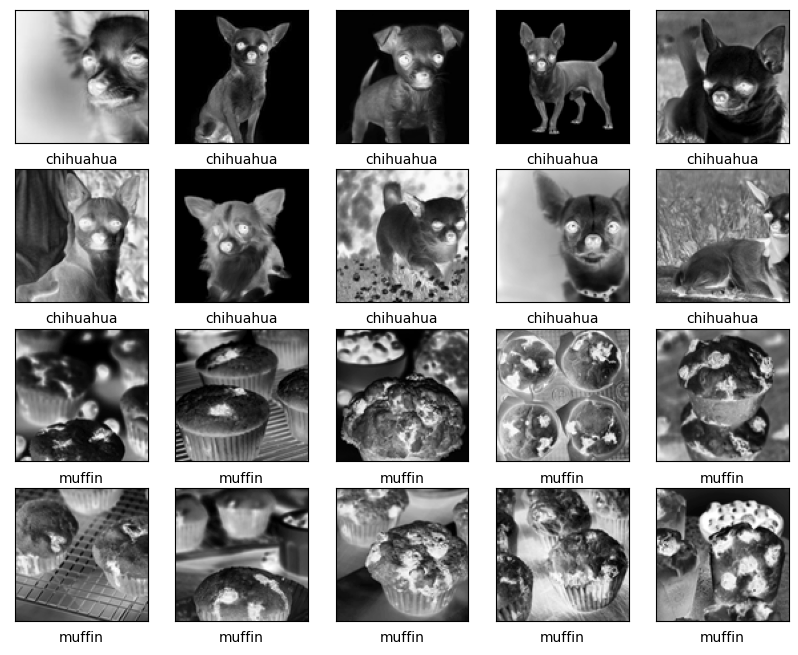

In [13]:
# execute the function to show the data
display_images(train_images, train_labels)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

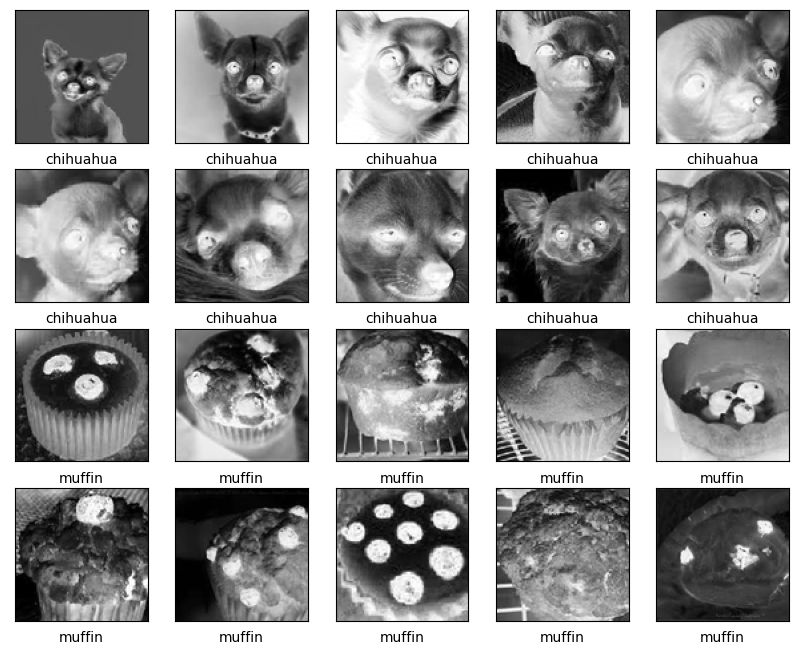

In [14]:
display_images(test_images, test_labels)
plt.show

In [15]:
# DATA PREPROCESSING
# scaling the images between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

In [16]:
# Build the model
# setting up layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100)),
        keras.layers.Dense(128, activation=tf.nn.sigmoid),
        keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [17]:
# COMPILE THE MODEL
sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.7, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# train model
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 915ms/step - loss: 0.9138 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 0.8246 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 0.7505 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6854 - accuracy: 0.7000
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6834 - accuracy: 0.5500
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6828 - accuracy: 0.5500
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6823 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.6814 - accuracy: 0.4500
Epoch 11/100
1/1 [

1/1 [==============================] - 0s 16ms/step - loss: 0.5173 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5142 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5111 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 18ms/step - loss: 0.5080 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5048 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 21ms/step - loss: 0.5016 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 32ms/step - loss: 0.4985 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 36ms/step - loss: 0.4953 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4921 - accuracy: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4888 - accuracy: 1.0000
Epoch 93/100
1/1 [=====

In [20]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 284ms/step - loss: 0.6503 - accuracy: 0.6500
Test accuracy: 0.6499999761581421


In [21]:
# make predictions
predictions = model.predict(test_images)

1/1 [==============================] - 0s 177ms/step


In [22]:
print(predictions)

[[0.53024507 0.469755  ]
 [0.6193304  0.3806696 ]
 [0.61944824 0.38055182]
 [0.572098   0.427902  ]
 [0.39773065 0.60226935]
 [0.42213598 0.577864  ]
 [0.39188248 0.6081175 ]
 [0.40619004 0.5938099 ]
 [0.55938125 0.4406187 ]
 [0.39982954 0.6001705 ]
 [0.46612483 0.53387517]
 [0.42035314 0.5796469 ]
 [0.54557914 0.45442078]
 [0.34439203 0.65560794]
 [0.44390908 0.5560909 ]
 [0.42397827 0.57602173]
 [0.31748945 0.68251055]
 [0.43473905 0.565261  ]
 [0.37712967 0.6228703 ]
 [0.5445694  0.45543063]]


<function matplotlib.pyplot.show(close=None, block=None)>

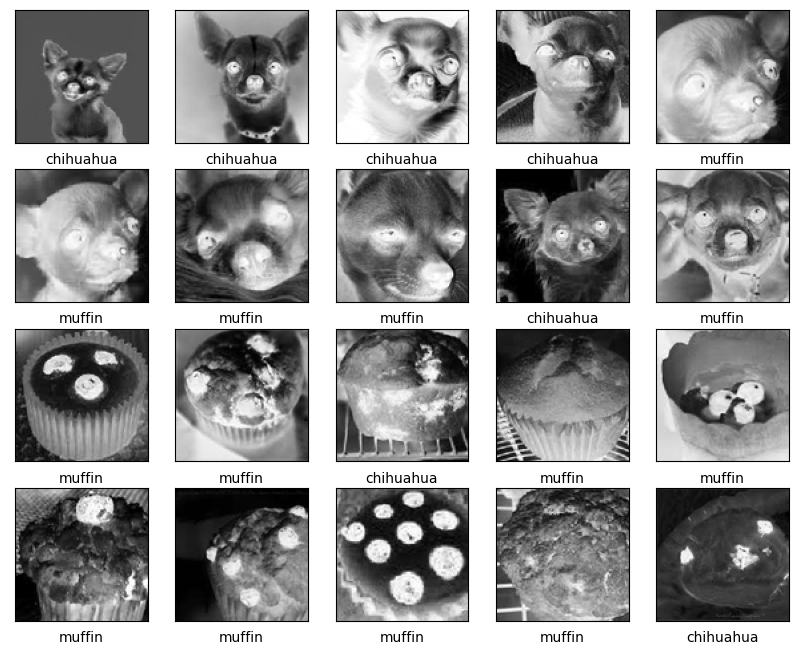

In [23]:
display_images(test_images, np.argmax(predictions, axis=1))
plt.show